Predictive Machine Learning Algorithms for Analyzing Fuel Price Trends in Toronto

In [11]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

Importing the dataset

In [12]:
#importing the dataset from the url
df = "https://ontario.ca/v1/files/fuel-prices/pumppricesall.csv"
data = pd.read_csv(df)

#renaming the columns for better understanding
data.columns= ["Date", "Pump Price", "Crude Cost", "Federal Excise Tax", "Federal Carbon Tax", " Ontario Tax", "GST/HST", "Wholesale Margin", "Retail Margin", "Region"]

# Only using Toronto Data from the dataset 
toronto_data = data[data["Region"] == "Toronto"]

Cleaning the data

In [13]:

# Check for missing values and handle them if needed
toronto_data = toronto_data.dropna()

# Remove leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Convert the "Date" column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Verify the changes
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                536 non-null    datetime64[ns]
 1   Pump Price          536 non-null    float64       
 2   Crude Cost          536 non-null    float64       
 3   Federal Excise Tax  536 non-null    float64       
 4   Federal Carbon Tax  536 non-null    float64       
 5   Ontario Tax         536 non-null    float64       
 6   GST/HST             536 non-null    float64       
 7   Wholesale Margin    536 non-null    float64       
 8   Retail Margin       536 non-null    float64       
 9   Region              536 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 42.0+ KB
None
        Date  Pump Price  Crude Cost  Federal Excise Tax  Federal Carbon Tax  \
0 1987-01-01        43.1        13.4                 4.5          

Descriptive stats for Toronto

In [ ]:
toronto_numeric_data = toronto_data.drop(columns=["Date", "Region"])
summary_stats = toronto_numeric_data.describe()
print(summary_stats)

       Pump Price  Crude Cost  Federal Excise Tax  Federal Carbon Tax  \
count  454.000000  454.000000          454.000000          454.000000   
mean    89.135683   35.542952            9.499119            1.466079   
std     35.196294   19.598960            1.105255            3.877033   
min     43.100000   10.300000            4.500000            0.000000   
25%     55.200000   16.000000           10.000000            0.000000   
50%     84.900000   33.050000           10.000000            0.000000   
75%    116.900000   50.050000           10.000000            0.000000   
max    207.200000   95.300000           10.000000           17.600000   

        Ontario Tax     GST/HST  Wholesale Margin  Retail Margin  
count    454.000000  454.000000        454.000000     454.000000  
mean      13.752643    8.073789         14.882159       5.924449  
std        2.032154    5.289762          8.458015       2.562964  
min        8.300000    3.100000          3.400000      -2.300000  
25%    

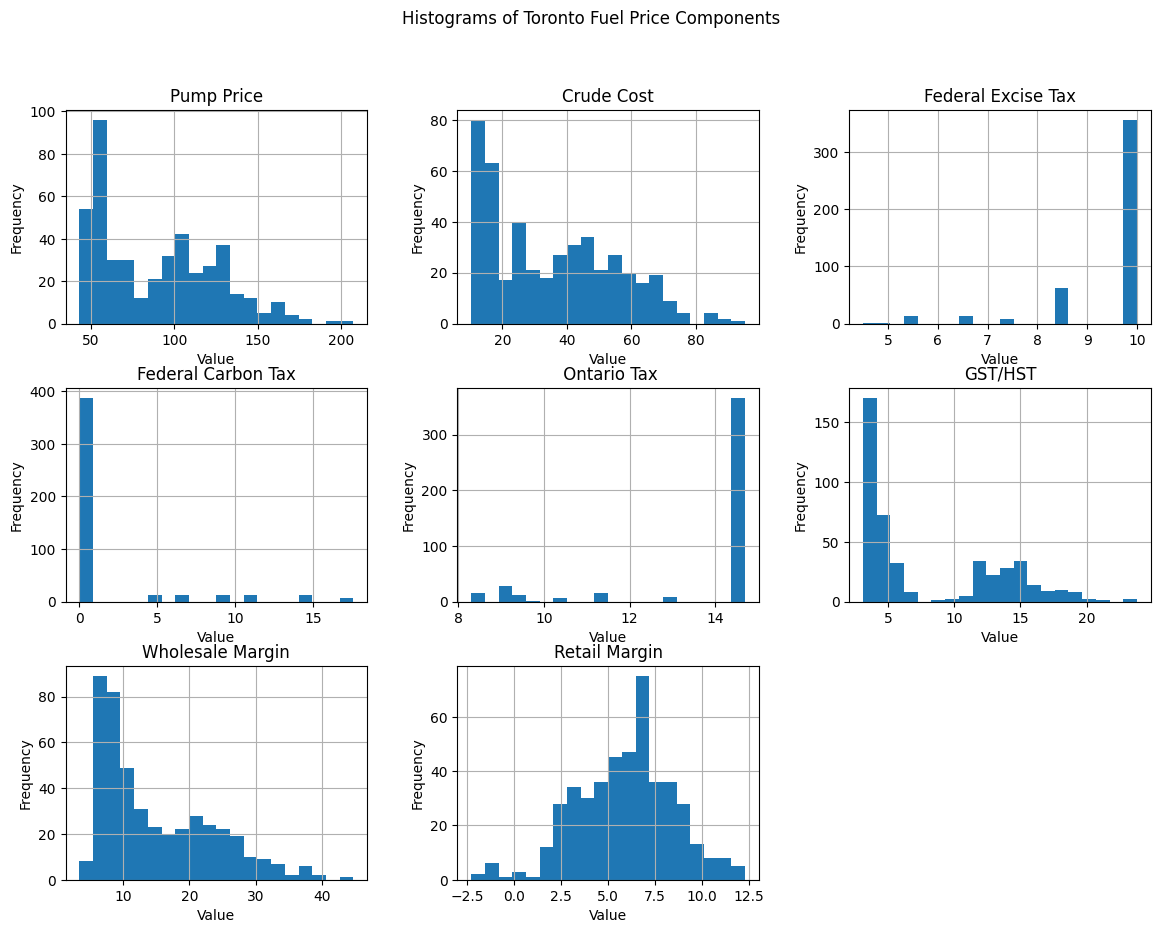

In [15]:
# Histograms
axes = toronto_numeric_data.hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Toronto Fuel Price Components')

for ax in axes.flatten():
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.show()


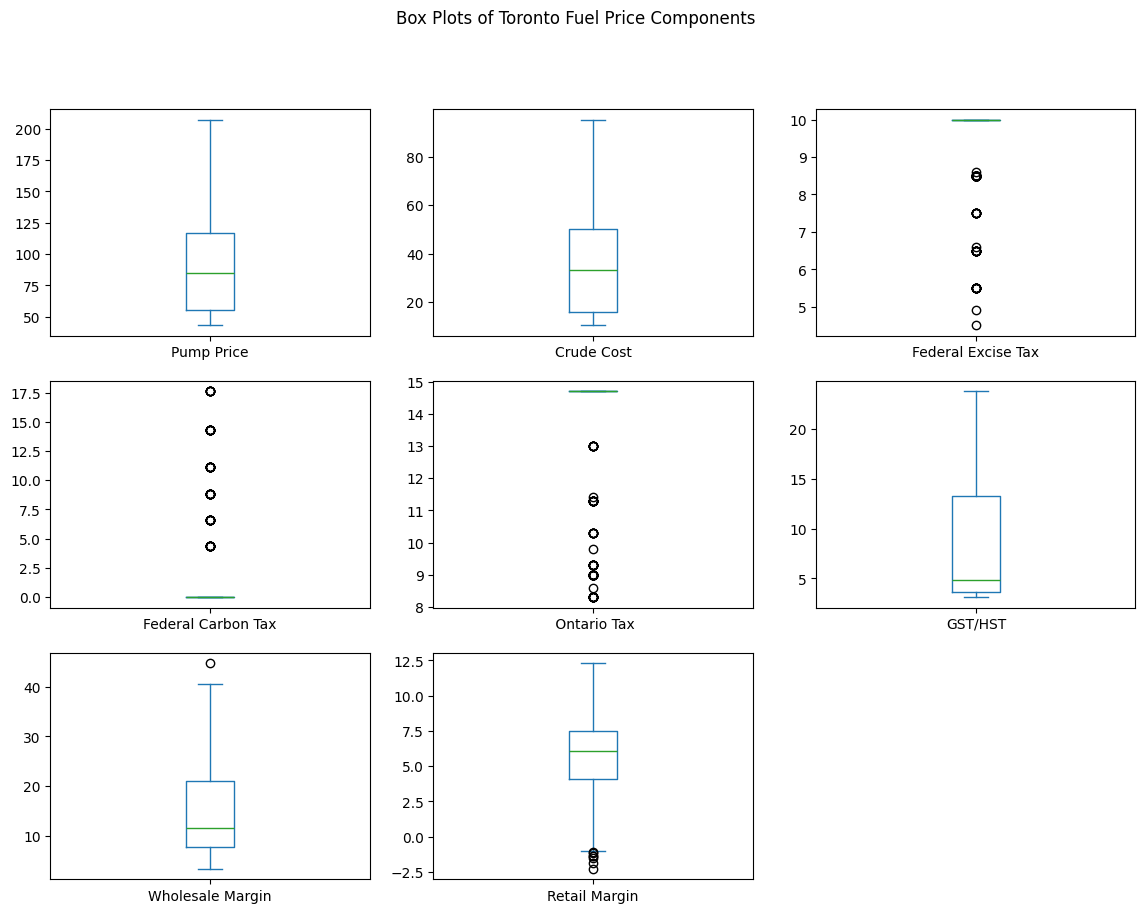

In [16]:

# Box plots
toronto_numeric_data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(14, 10), sharex=False, sharey=False)
plt.suptitle('Box Plots of Toronto Fuel Price Components')
plt.show()

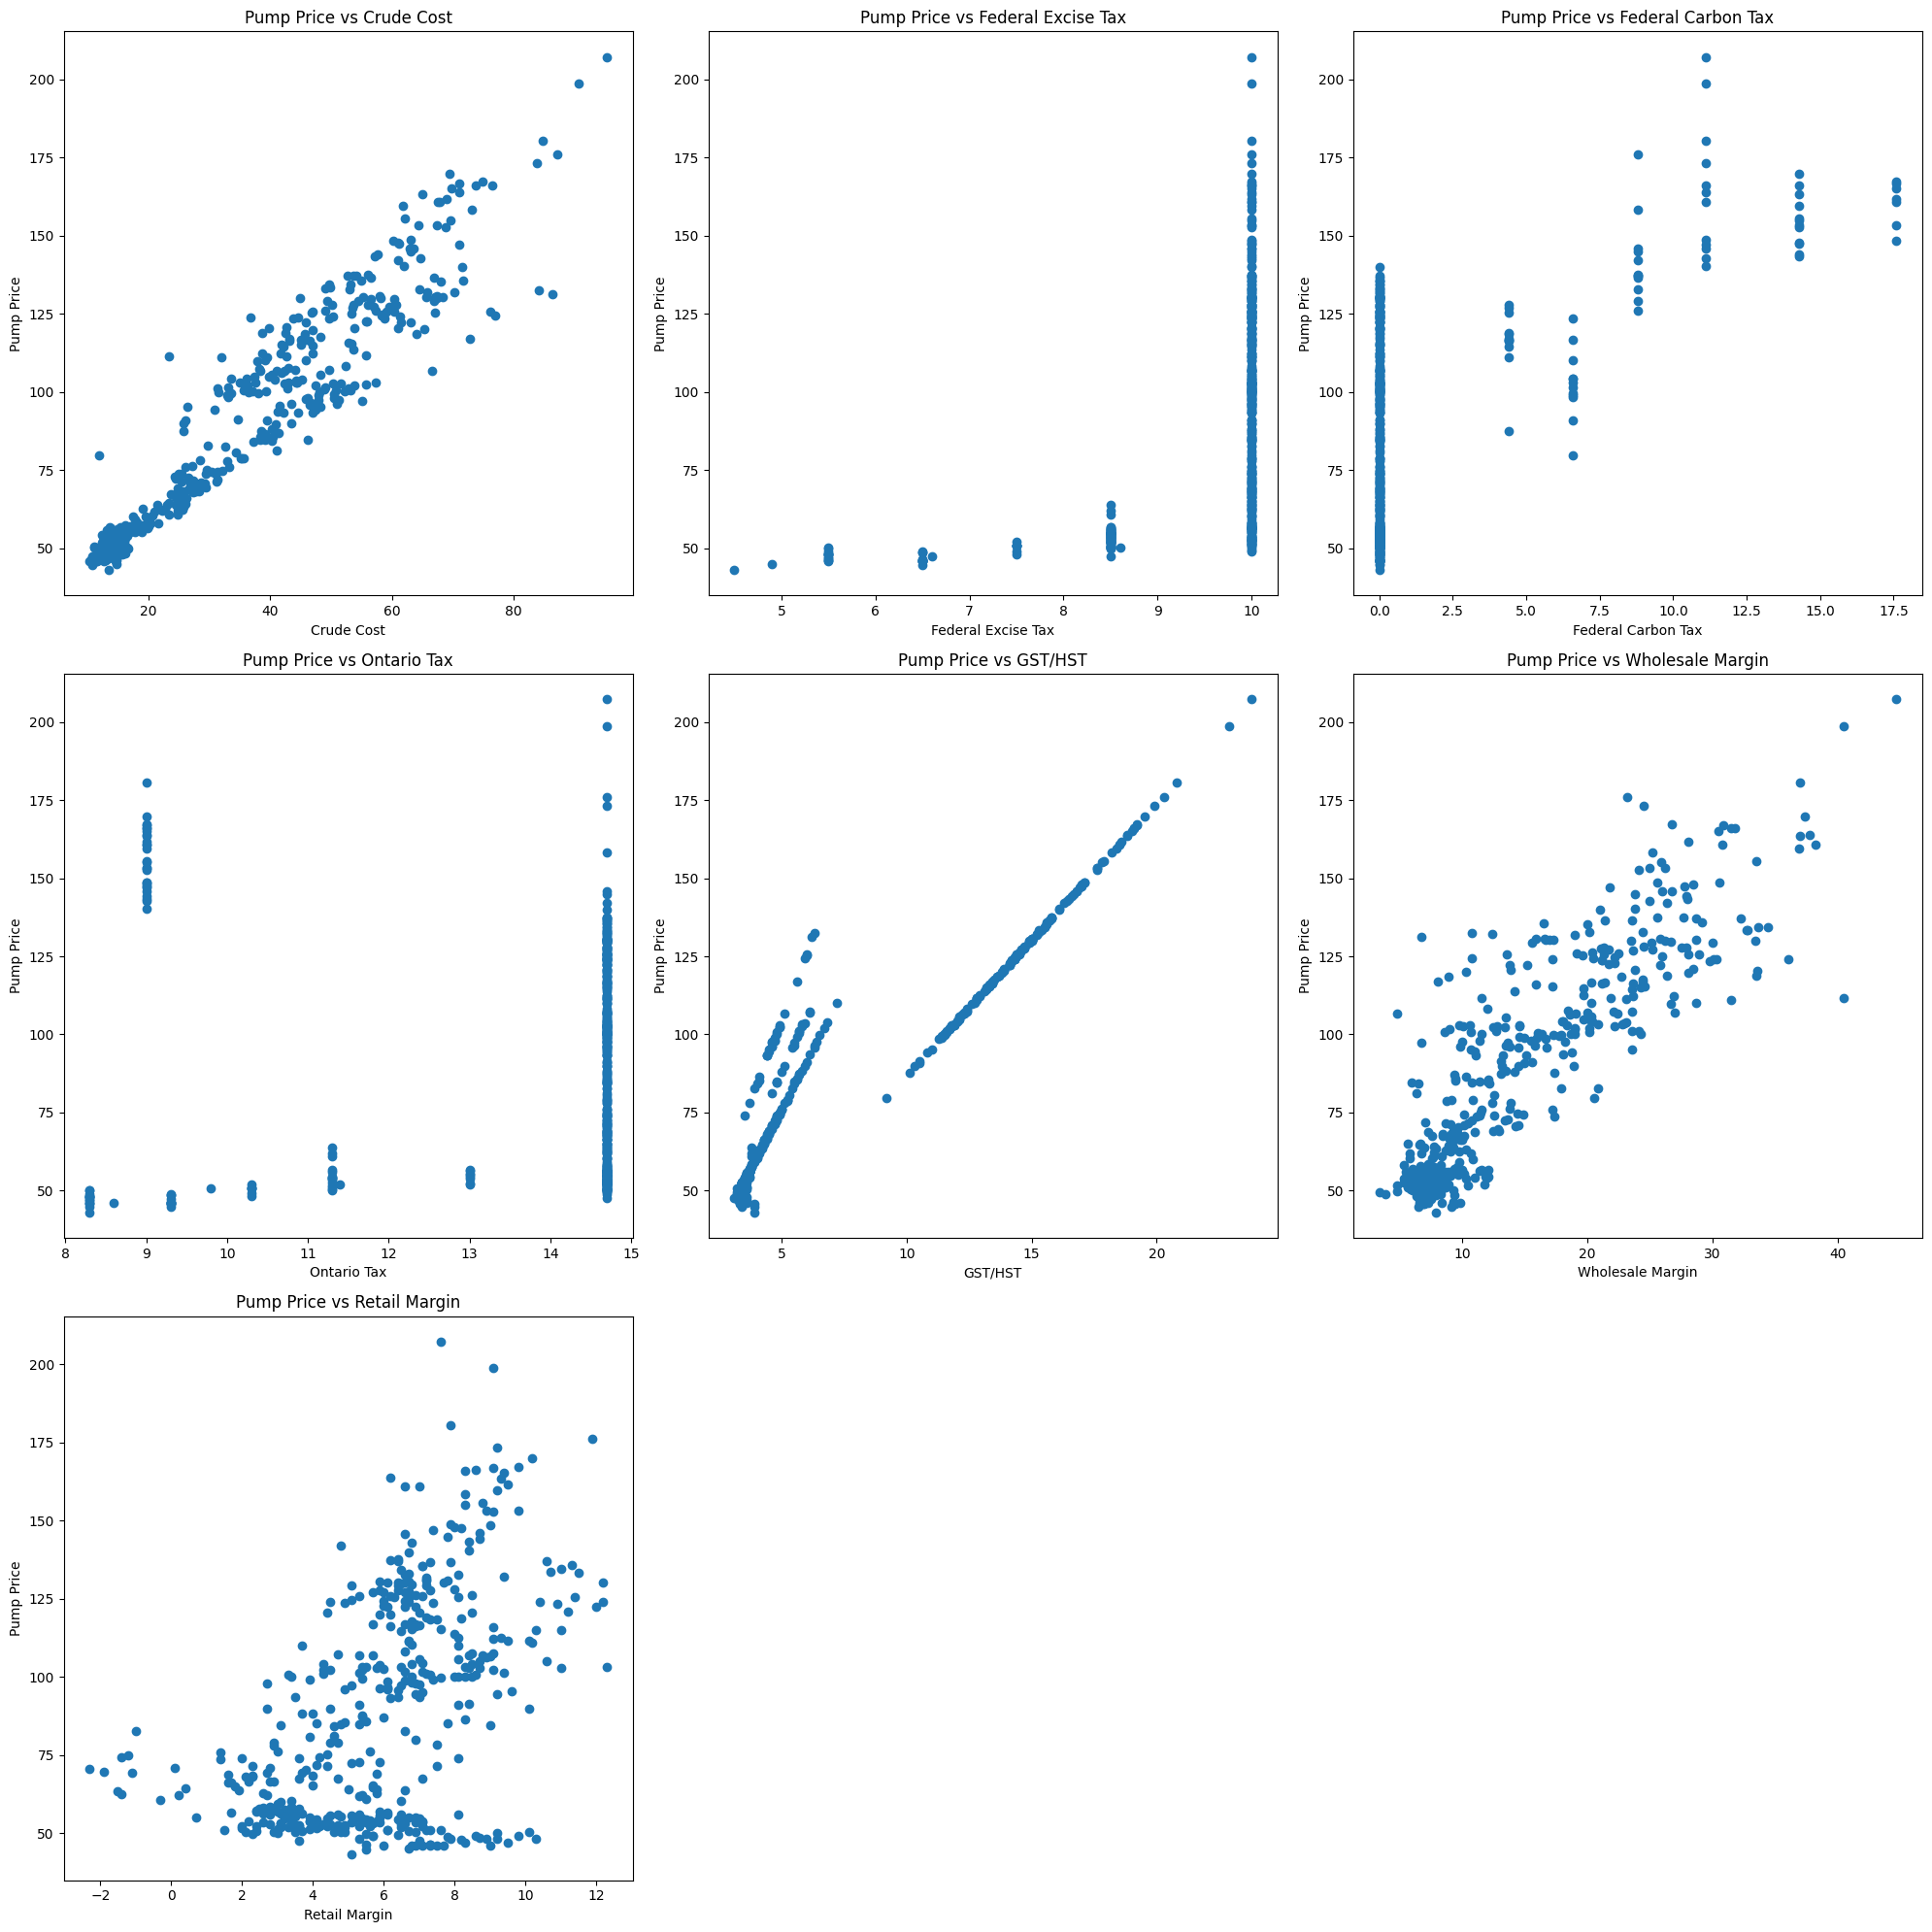

In [18]:
# Strip leading and trailing spaces from column names in toronto_numeric_data
toronto_numeric_data.columns = toronto_numeric_data.columns.str.strip()

# Scatter plots
columns_to_compare = ["Crude Cost", "Federal Excise Tax", "Federal Carbon Tax", "Ontario Tax", "GST/HST", "Wholesale Margin", "Retail Margin"]

plt.figure(figsize=(20, 20))
for i, column in enumerate(columns_to_compare):
    plt.subplot(3, 3, i + 1)
    plt.scatter(toronto_numeric_data[column], toronto_numeric_data["Pump Price"])
    plt.xlabel(column)
    plt.ylabel("Pump Price")
    plt.title(f"Pump Price vs {column}")

plt.tight_layout()
plt.show()

Data preperation


In [32]:
# Define features (X) and target (y)
X = toronto_numeric_data.drop(columns=["Pump Price"])  # Features
y = toronto_numeric_data["Pump Price"]  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MAE: {mae_linear}, MSE: {mse_linear}, R2: {r2_linear}")

Linear Regression - MAE: 0.04523458186491921, MSE: 0.004154125802038957, R2: 0.9999969517476534


In [24]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MAE: {mae_rf}, MSE: {mse_rf}, R2: {r2_rf}")

Random Forest Regressor - MAE: 0.8890549450549357, MSE: 1.9960313186813123, R2: 0.9985353339207332


In [25]:
# Train K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regression Metrics:")
print(f"MSE: {mse_knn}, MAE: {mae_knn}, R2: {r2_knn}")


KNN Regression Metrics:
MSE: 12.446061538461523, MAE: 1.878021978021977, R2: 0.9908672153661926


Comparing Model Performance 

In [26]:
# Summary of model performance
performance_metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "KNN Regression"],
    "MSE": [mse_linear, mse_rf, mse_knn],
    "MAE": [mae_linear, mae_rf, mae_knn],
    "R2": [r2_linear, r2_rf, r2_knn]
})
print(performance_metrics)


               Model        MSE       MAE        R2
0  Linear Regression   0.004154  0.045235  0.999997
1      Random Forest   1.996031  0.889055  0.998535
2     KNN Regression  12.446062  1.878022  0.990867


Visualize predictions for each model with sorted values

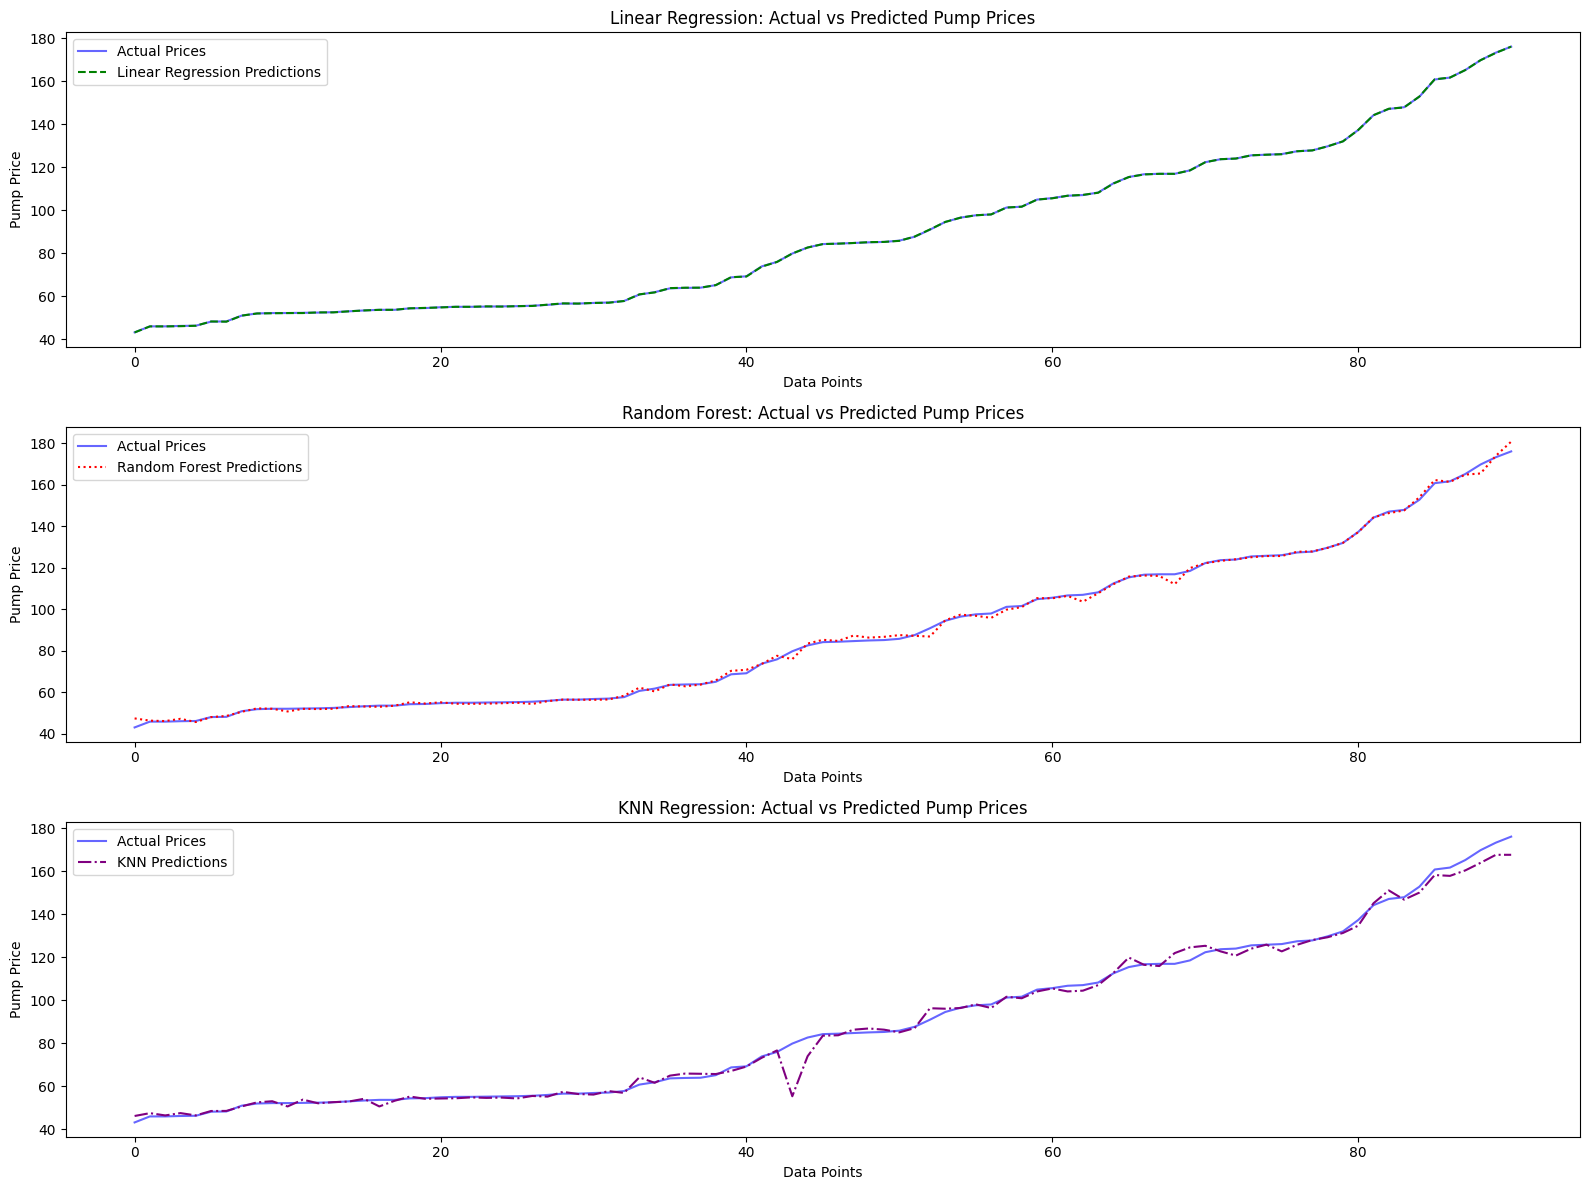

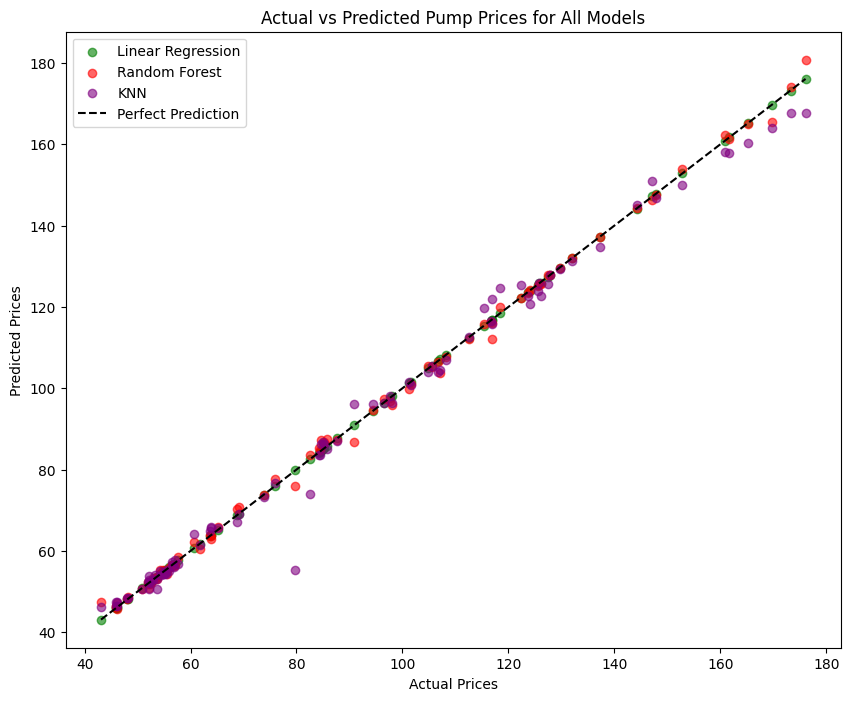

In [33]:
# Sort the test data to make patterns clearer
y_test_sorted_indices = y_test.argsort()
y_test_sorted = y_test.iloc[y_test_sorted_indices]
X_test_sorted = X_test.iloc[y_test_sorted_indices]

# Generate predictions for sorted data
y_pred_linear_sorted = linear_model.predict(X_test_sorted)
y_pred_rf_sorted = rf_model.predict(X_test_sorted)
y_pred_knn_sorted = knn_model.predict(X_test_sorted)

# Create subplots for each model
plt.figure(figsize=(16, 12))

# Linear Regression
plt.subplot(3, 1, 1)
plt.plot(y_test_sorted.values, label="Actual Prices", color="blue", alpha=0.6)
plt.plot(y_pred_linear_sorted, label="Linear Regression Predictions", color="green", linestyle="--")
plt.legend() 
plt.title("Linear Regression: Actual vs Predicted Pump Prices")
plt.xlabel("Data Points")
plt.ylabel("Pump Price")

# Random Forest
plt.subplot(3, 1, 2)
plt.plot(y_test_sorted.values, label="Actual Prices", color="blue", alpha=0.6)
plt.plot(y_pred_rf_sorted, label="Random Forest Predictions", color="red", linestyle=":")
plt.legend()
plt.title("Random Forest: Actual vs Predicted Pump Prices")
plt.xlabel("Data Points")
plt.ylabel("Pump Price")

# KNN Regression
plt.subplot(3, 1, 3)
plt.plot(y_test_sorted.values, label="Actual Prices", color="blue", alpha=0.6)
plt.plot(y_pred_knn_sorted, label="KNN Predictions", color="purple", linestyle="-.")
plt.legend()
plt.title("KNN Regression: Actual vs Predicted Pump Prices")
plt.xlabel("Data Points")
plt.ylabel("Pump Price")

plt.tight_layout()
plt.show()

# Scatter Plot for Overall Comparison
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_linear, alpha=0.6, label="Linear Regression", color="green")
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest", color="red")
plt.scatter(y_test, y_pred_knn, alpha=0.6, label="KNN", color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black", linestyle="--", label="Perfect Prediction")
plt.legend()
plt.title("Actual vs Predicted Pump Prices for All Models")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()



 Visualize predictions for each model without sorting

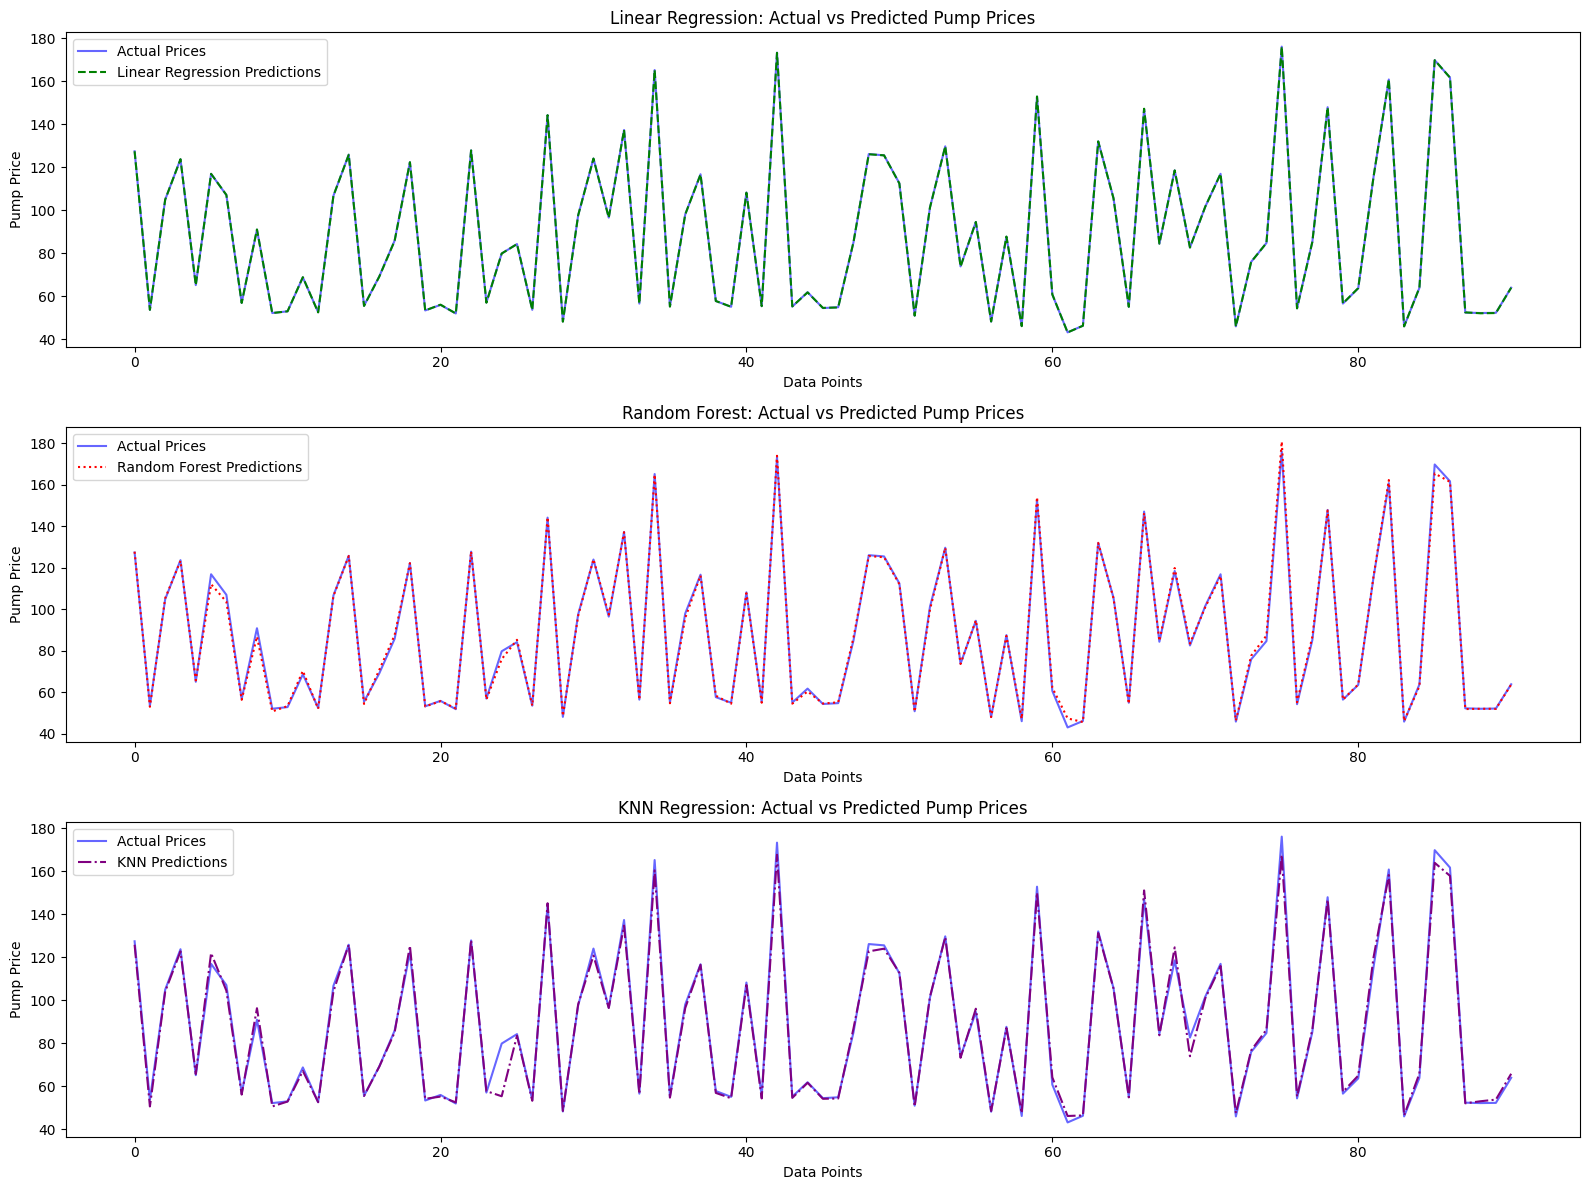

In [ ]:

plt.figure(figsize=(16, 12))

# Linear Regression
plt.subplot(3, 1, 1)
plt.plot(range(len(y_test)), y_test.values, label="Actual Prices", color="blue", alpha=0.6)
plt.plot(range(len(y_pred_linear)), y_pred_linear, label="Linear Regression Predictions", color="green", linestyle="--")
plt.legend()
plt.title("Linear Regression: Actual vs Predicted Pump Prices")
plt.xlabel("Data Points")
plt.ylabel("Pump Price")

# Random Forest
plt.subplot(3, 1, 2)
plt.plot(range(len(y_test)), y_test.values, label="Actual Prices", color="blue", alpha=0.6)
plt.plot(range(len(y_pred_rf)), y_pred_rf, label="Random Forest Predictions", color="red", linestyle=":")
plt.legend()
plt.title("Random Forest: Actual vs Predicted Pump Prices")
plt.xlabel("Data Points")
plt.ylabel("Pump Price")

# KNN Regression
plt.subplot(3, 1, 3)
plt.plot(range(len(y_test)), y_test.values, label="Actual Prices", color="blue", alpha=0.6)
plt.plot(range(len(y_pred_knn)), y_pred_knn, label="KNN Predictions", color="purple", linestyle="-.")
plt.legend()
plt.title("KNN Regression: Actual vs Predicted Pump Prices")
plt.xlabel("Data Points")
plt.ylabel("Pump Price")

plt.tight_layout()
plt.show()
